# Estimation of Temperature and Pressure of a Constant Volume Propane-Oxygen Mixture

A recent project required a first-order approximation to determine if an explosive gas mixture would result in a tank rupture.  The following analysis done in Python follows Coopers analysis [[1]]  It provides a reasonable approximation, however it is sensitive to the chemical reaction hieratchy assumed.

This post is based on an initial analysis of an article in [Inspire 12](https://en.wikipedia.org/wiki/Inspire_(magazine)).  I used the [pint](https://pint.readthedocs.io/en/latest/) library to provide [dimensional analysis](https://en.wikipedia.org/wiki/Dimensional_analysis) where I could.  A second post on this topic will be written where I used the [Cantera](https://cantera.org/) and [SDToolbox](http://shepherd.caltech.edu/EDL/PublicResources/sdt/) libraries to perform a more in depth analysis.

To start this analysis let's load the necessary Python libraries and some formating,

In [134]:
# Setup for calcuations
import pint
u = pint.UnitRegistry()
u.default_format = '~P'
from prettytable import PrettyTable
from IPython.display import display, Math
from sympy import *
init_printing(use_unicode=True)
from sympy import *
init_printing(use_unicode=True)
from numpy import linspace
from sympy import lambdify
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 1.61803398875*8, 8
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

## Volume of Standard 20 lb Propane Tank

To start this analysis we need to calculate the volume of a 20 lb propane tank.  Using the weight of water in a 20 lb propane tank, $wt_{H_{2}O}= 21.6\:kg$ and the density of water, $\rho_{H_{2}}= 1000\:\frac{kg}{m^3}$ we can calculate the volume of the tank,

In [135]:
wt_water = 21.6*u.kilogram
rho_water = 1000*u.kilogram/u.meter**3
v_tank = wt_water/rho_water
display(Math((r"V_{{tank}} = %s" % latex(v_tank))))

<IPython.core.display.Math object>

## Explosive Gas Mixture Recipe

The sections of the article relevant to the preparation of the gas mixture are:

- Discharge gas from the propane tank until only, $P_{C_3H_8} = 4\:bar$, are left in it.
- Insert, $P_{O_2}= 9\:bar$

Therefore, the partial pressure of propane is,

In [136]:
p_c3h8 = 4*u.bar
p_c3h8.ito(u.pascal)
r = 8.314*(u.meter**3*u.pascal)/(u.mole*u.kelvin)
t_c3h8 = 293.2*u.kelvin
p_c3h8.ito(u.kilopascal)
display(Math((r"P_{{C_3H_8}} = %s" % latex(p_c3h8))))
p_c3h8.ito(u.pascal)


<IPython.core.display.Math object>

Using the ideal gas law, the weight and moles of propane are,

In [137]:
n_c3h8 = (p_c3h8*v_tank)/(r*t_c3h8)
mw_c3h8 = 44.0956*u.gram/u.mole
wt_c3h8 = n_c3h8*mw_c3h8
wt_c3h8.ito(u.pound)
display(Math((r"W_{{C_3H_8}} = {:3.3}\:lb".format(latex(wt_c3h8)))))
display(Math((r"n_{{C_3H_8}} = {:3.3}\:mol".format(latex(n_c3h8)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The partial pressure of the oxygen would be,

In [138]:
p_o2 = 9*u.bar
p_o2.ito(u.pascal)
r = 8.314*(u.meter**3*u.pascal)/(u.mole*u.kelvin)
t_o2 = 293.2*u.kelvin
p_o2.ito(u.kilopascal)
display(Math((r"P_{{O_2}} = %s" % latex(p_o2))))
p_o2.ito(u.pascal)

<IPython.core.display.Math object>

Again using the ideal gas law the weight and moles of oxygen are,

In [139]:
n_o2 = (p_o2*v_tank)/(r*t_o2)
mw_o2 = 31.9988*u.gram/u.mole
wt_o2 = n_o2*mw_o2
wt_o2.ito(u.pound)
display(Math((r"W_{{O_2}} = {:3.3}".format(latex(wt_o2)))))
display(Math((r"n_{{O_2}} = {:3.3}".format(latex(n_o2)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The total gas mixture weight is,

In [140]:
wt_tot = wt_c3h8 + wt_o2
display(Math((r"W_{{tot}} = %s" % latex(wt_tot))))
wt_tot.ito(u.grams)

<IPython.core.display.Math object>

## Chemical Reaction
The CHNO reaction hieratchy is,

1. All carbon is burned to CO.
2. All the hydrogen is burned to H2O.
3. Any oxygen left after CO and H2O formation burns CO to CO2. 4. All the nitrogen forms N2.
5. Any oxygen remaining forms O2.
6. Any hydrogen remaining form H2.
7. Any carbon reamaining forms C.

For our reaction substituting the moles of propane and oxygen we have, 


$$3.544C_3H_8 + 7.975O_2 → 10.623CO + 5.327H_2O +  + 8.849H_2$$

Normalizing on the number of moles of propane we have, 

$$C_3H_8 + 2.25O_2 → 1.5H_2O + 3CO + 2.5H_2$$

Leaving 2.5 moles of hydrogen unreacted for every mole of propane burned or a fuel rich reaction. Once the tank has ruptured this free hydrogen and the carbon monoxide will react with the oxygen in the air.

## Heat Produced

Because we are interested in the the pressure and temperature inside the tank we will ignore that it will eventually rupture and that the excess hydrogen will be consumed in the afterburn. In this case the heat evolved is equal to the heat of explosion of the propane.

$$ΔH_{expo} = ΣΔH_{fo}(products) - ΔH_{fo}(reactants)$$

From the National Institute of Standards and Testing (NIST) we have the enthalpy of formations for the products and reactants,


In [141]:
# Enthalpy of Formation from NIST
d_H_c3h8 = -2354*u.joule/u.gram
d_H_h2o  = -13420*u.joule/u.gram
d_H_co   = -3945*u.joule/u.gram

# Molecular Weights from NIST
mw_h2o = 18.0153*u.gram/u.mole
mw_co  = 28.0101*u.gram/u.mole

# Moles of Reactants
n_h2o = 5.327*u.moles
n_co = 10.623*u.moles
n_h2 = 8.849*u.moles

pt = PrettyTable()

print_mole_c3h8 = f"{n_c3h8:0.2f}"
print_mole_h2o = f"{n_h2o:0.2f}"
print_mole_co = f"{n_co:0.2f}"
print_H_c3h8 = f"{d_H_c3h8*mw_c3h8:0.2f}"
print_H_h2o = f"{d_H_h2o*mw_h2o:0.2f}"
print_H_co = f"{d_H_co*mw_co:0.2f}"

pt.field_names = ["Compound","Hf - J/g", "MW - g/mol", "Hf - J/mol", "n"]
pt.add_row(["Propane", d_H_c3h8, mw_c3h8, print_H_c3h8, print_mole_c3h8])
pt.add_row(["Water", d_H_h2o, mw_h2o, print_H_h2o, print_mole_h2o])
pt.add_row(["Carbon Monoxide", d_H_co, mw_co, print_H_co, print_mole_co])

print(pt)

+-----------------+--------------+---------------+-------------------------+------------+
|     Compound    |   Hf - J/g   |   MW - g/mol  |        Hf - J/mol       |     n      |
+-----------------+--------------+---------------+-------------------------+------------+
|     Propane     | -2354.0 J/g  | 44.0956 g/mol | -103801.04 joule / mole | 3.54 mole  |
|      Water      | -13420.0 J/g | 18.0153 g/mol | -241765.33 joule / mole | 5.33 mole  |
| Carbon Monoxide | -3945.0 J/g  | 28.0101 g/mol | -110499.84 joule / mole | 10.62 mole |
+-----------------+--------------+---------------+-------------------------+------------+


Calculating the heat of explosion we have,

In [142]:
d_H_exp = (n_h2o*d_H_h2o*mw_h2o + n_co*d_H_co*mw_co)-n_c3h8*d_H_c3h8*mw_c3h8
display(Math(r'\Delta H_{{exp}} = {:.02f~P}'.format(d_H_exp)))

<IPython.core.display.Math object>

## TNT Equivalency
We we can equate the heat of detonation of propane to the heat of detonation of TNT to detrmine a TNT equivalency. We can get the experimentally derived heat of detonation of TNT from Cooper (page 132) which is,

In [143]:
d_H_tnt = -247500*u.calorie/u.mole
d_H_tnt.ito(u.joules/u.mole)
display(Math(r'\Delta H_{{TNT}} = {:.02f~P}'.format(d_H_tnt)))

<IPython.core.display.Math object>

The molecular weight of TNT is,

In [144]:
mw_tnt = 227.1*u.gram/u.mole
display(Math(r'MW_{{TNT}} = {:.02f~P}'.format(mw_tnt)))

<IPython.core.display.Math object>


Dividing by the heat of detonation for TNT by the molecular weight we have,

In [145]:
d_h_tnt = d_H_tnt/mw_tnt
display(Math(r'\Delta h_{{TNT}} = {:.02f~P}'.format(d_h_tnt)))

<IPython.core.display.Math object>

If we divide the heat of exposion of propane calculated above by the weight of the propane-oxygen mixture we have,

In [146]:
d_h_exp = d_H_exp/wt_tot
display(Math(r'\Delta h_{{exp}} = {:.02f~P}'.format(d_h_exp)))

<IPython.core.display.Math object>

So we can estimate the TNT equivalency by dividing the specific heat of explosion of propane by the specific heat of detonation of TNT or,

In [147]:
tnt_eqv = d_h_exp/d_h_tnt
display(Math(r'E_{{\Delta h}} = {:.02f~P}'.format(tnt_eqv)))

<IPython.core.display.Math object>

So theroretically, the propane-oxygen mixture is 1.12 times more powerful than TNT, however, the hierarchy of products plays a significant role in the amount of energy calculated to be released. Depending on the method used errors as large as $\pm 30\%$ can be observed as compared to experimentally determined values (Cooper pg 132). Using this margin of error a more realistic value for the TNT equivalency would be $1.12 \pm 0.34$.

## Temperature of the Gases

A simple method of determining the temperature of the gases inside the tank, $T_V$, is to use,

$$T_V = T_a\lambda$$

where, $T_a$ is the adiabatic flame temperature and $\lambda$ is the ratio of the specific heats of the gases, $\lambda=\frac{C_P}{C_V}$.  The adiabatic flame temperature can be found from,

$$Q=n\int_{T_0}^{T_a} \! C_P \, \mathrm{d}T$$

where $C_P$ is the average specific heat of the combustion gases at constant pressure, $n$ is the number of moles of combution gases. The average heat capactity, $C_P$, of the gases can be calculated using,

$$C_P=\sum_{i=n}^{1}\left(n_i\cdot C_{Pi}\right)$$

To calcualte the mole fractions of the product gases we first need the total moles of products,

In [148]:
N_prod = n_h2o+n_co+n_h2
display(Math(r'n_{{total}} = {:.02f~P}'.format(N_prod)))

<IPython.core.display.Math object>

the mole fractions are then,

In [149]:
n_frac_co = n_co/N_prod
n_frac_h2o = n_h2o/N_prod
n_frac_h2 = n_h2/N_prod
display(Math(r'X_{{CO}} = {:.02f~P}'.format(n_frac_co)))
display(Math(r'X_{{H_2O}} = {:.02f~P}'.format(n_frac_h2o)))
display(Math(r'X_{{H_2}} = {:.02f~P}'.format(n_frac_h2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

From Cooper Table 8.2 the molar heat capacities of carbon monoxide, water, and hydrogen are,

In [150]:
T= symbols('T', positive = True)
Ta= symbols('Ta', positive = True, real = True)
C_P_co = Function('C_P_co')('T')
C_P_h2o = Function('C_P_h2o')('T')
C_P_h2 = Function('C_P_h2')('T')

C_P_co  = 6.350 + 1.811e-3*T - 0.2675e-6*T**2
C_P_h2o = 7.136 + 2.640e-3*T + 0.0459e-6*T**2
C_P_h2  = 6.946 - 0.196e-3*T + 0.4757e-6*T**2
display(Math((r"C_{{P-CO}} = %s" % latex(C_P_co))))
display(Math((r"C_{{P-H_2O}} = %s" % latex(C_P_h2o))))
display(Math((r"C_{{P-H2}} = %s" % latex(C_P_h2))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Multiplying through by the mole fraction and summing we have the average specific heat at constant pressure for carbon monoxide, water, and hydrogen,

In [151]:
c_p = (n_frac_co.magnitude)*(C_P_co) + (n_frac_h2o.magnitude)*(C_P_h2o) + (n_frac_h2.magnitude)*(C_P_h2)
c_p

display(Math((r"C_{{P-avg}} = %s" % latex(c_p))))

<IPython.core.display.Math object>

Changing the units of the $\Delta H_{exp}$ to calories and integrating from $298\:K$ to $T_a$ we have,

$$Q=n\int_{T_0}^{T_a} \! C_P \, \mathrm{d}T$$

In [152]:
d_H_exp.ito(u.calorie)
q = N_prod*integrate(c_p, (T, 298, Ta))

display(Math(r'\Delta H_{{exp}} = Q = {:.02f~P}'.format(d_H_exp)))
display(Math((r"Q = %s" % latex(q.magnitude))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The only thing we don't know in the equation is $T_a$, so solving for $T_a$ we have,

In [153]:
sol = solve(q.magnitude + d_H_exp.magnitude, Ta)[0]*u.K
display(Math((r"T_a = {:6.6} \:K".format(latex(sol)))))

<IPython.core.display.Math object>

Plotting $Q$ vs. $T_a$ we have,

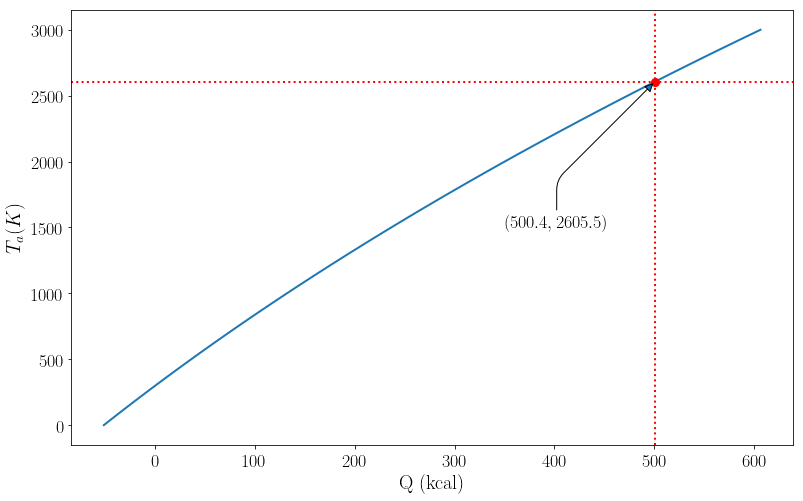

In [154]:
sol = solve(q.magnitude + d_H_exp.magnitude, Ta)[0] # this was added because there are no units.
r = [sol, d_H_exp.magnitude]

lam_x = lambdify(Ta, q.magnitude, modules=['numpy'])

x_vals = linspace(0, 3000, 100)
y_vals = lam_x(x_vals)/1000

plt.plot(y_vals, x_vals, -d_H_exp.magnitude/1000, sol, 'ro')
plt.axhline(sol, color = 'red', linestyle = ':')
plt.axvline(-d_H_exp.magnitude/1000, color = 'red', linestyle = ':')

arrowprops = dict(
    arrowstyle = "-|>",
    connectionstyle = "angle, angleB=45,rad=10")
offset = 400
plt.annotate('$(%.1f, %.1f)$'%(-d_H_exp.magnitude/1000, sol), (-d_H_exp.magnitude/1000, sol), 
             xytext=(350, 1500), arrowprops=arrowprops)

plt.ylabel(r"$T_a (K)$")
plt.xlabel("Q (kcal)")
plt.show()

Now we can use ratio of specific heats, $\lambda$, for the correction to constant volume. We must calculate $\lambda$ for this mixture of gases using,

$$\lambda_{avg} = \sum_i n_i\cdot \lambda_i$$

where $n_i$ is the mole fraction and $\lambda$ is the ratio of specific heats for each product.

In [155]:
lambda_h2o = 1.324
lambda_co = 1.404
lambda_h2 = 1.410
lambda_avg = n_frac_co*lambda_co + n_frac_h2*lambda_h2 + n_frac_h2o*lambda_h2o
display(Math((r"\lambda_{{avg}} = {:3.3}".format(latex(lambda_avg)))))

<IPython.core.display.Math object>

The temperature a constant volume is given by,

$$T_v = T_a\cdot \lambda_{avg}$$

In [156]:
T_v = sol*lambda_avg
display(Math((r"T_{{V}} = {:6.6} \:K".format(latex(T_v*u.K)))))

<IPython.core.display.Math object>

## Pressure of Gases
Assuming pressures above 200 atm we can no longer use the ideal gas law equation of state (EOS). A common equation of state for pressures above 200 atm and commonly used in the field of interior balistics is the Noble-Able EOS:

$$P\left(V-0.025\cdot N_{{products}}\right)=0.0821\cdot N_{{products}}\cdot T$$

In [157]:
v_tank.ito(u.liter)
P_v = (0.0821*N_prod.magnitude*T_v)/(v_tank.magnitude-0.025*N_prod.magnitude)
display(Math((r"P = {:5.5} \:atm \:(5158.28\:psi)".format(latex(P_v)))))

<IPython.core.display.Math object>

This is almost 5 times the burst pressure of a standard 20lb propane tank and would cause the tank to fail catostrophically.

## References

1.  P. Cooper, Exlosives Engineering. New York, NY: Wiley-VCH Verlag GmbH Co., 1996.